<a href="https://colab.research.google.com/github/Airukua/Linier_Regression_From_Scratch/blob/main/Linier_Regression_From_Scratch_KFold_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import KFold

In [2]:
np.random.seed(42)
X = np.random.rand(100,8)
y = np.random.rand(100,1)

In [3]:
df = pd.DataFrame({'feature1':X[:, 0], 'feature2':X[:, 1], 'feature3':X[:, 2],
                   'feature4':X[:, 3], 'feature5':X[:, 4], 'feature6':X[:, 5],
                   'feature7':X[:, 6], 'feature8':X[:, 7]})
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176
1,0.601115,0.708073,0.020584,0.969910,0.832443,0.212339,0.181825,0.183405
2,0.304242,0.524756,0.431945,0.291229,0.611853,0.139494,0.292145,0.366362
3,0.456070,0.785176,0.199674,0.514234,0.592415,0.046450,0.607545,0.170524
4,0.065052,0.948886,0.965632,0.808397,0.304614,0.097672,0.684233,0.440152


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  100 non-null    float64
 1   feature2  100 non-null    float64
 2   feature3  100 non-null    float64
 3   feature4  100 non-null    float64
 4   feature5  100 non-null    float64
 5   feature6  100 non-null    float64
 6   feature7  100 non-null    float64
 7   feature8  100 non-null    float64
dtypes: float64(8)
memory usage: 6.4 KB


In [5]:
#no need normalization or standarization
df.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.473188,0.521632,0.435645,0.538168,0.481744,0.494702,0.499147,0.531426
std,0.308973,0.281286,0.287705,0.299888,0.301425,0.292254,0.297254,0.275084
min,0.005062,0.023272,0.018110,0.014545,0.014393,0.009197,0.012154,0.010838
25%,0.192313,0.272134,0.169232,0.288886,0.214339,0.242270,0.202823,0.314451
50%,0.487497,0.524634,0.413904,0.564591,0.499613,0.534779,0.500192,0.521156
75%,0.743677,0.753972,0.646846,0.795371,0.753157,0.728764,0.756410,0.790265
max,0.963620,0.989960,0.985650,0.999718,0.996637,0.990054,0.990505,0.969879


array([[<Axes: title={'center': 'feature1'}>,
        <Axes: title={'center': 'feature2'}>,
        <Axes: title={'center': 'feature3'}>],
       [<Axes: title={'center': 'feature4'}>,
        <Axes: title={'center': 'feature5'}>,
        <Axes: title={'center': 'feature6'}>],
       [<Axes: title={'center': 'feature7'}>,
        <Axes: title={'center': 'feature8'}>, <Axes: >]], dtype=object)

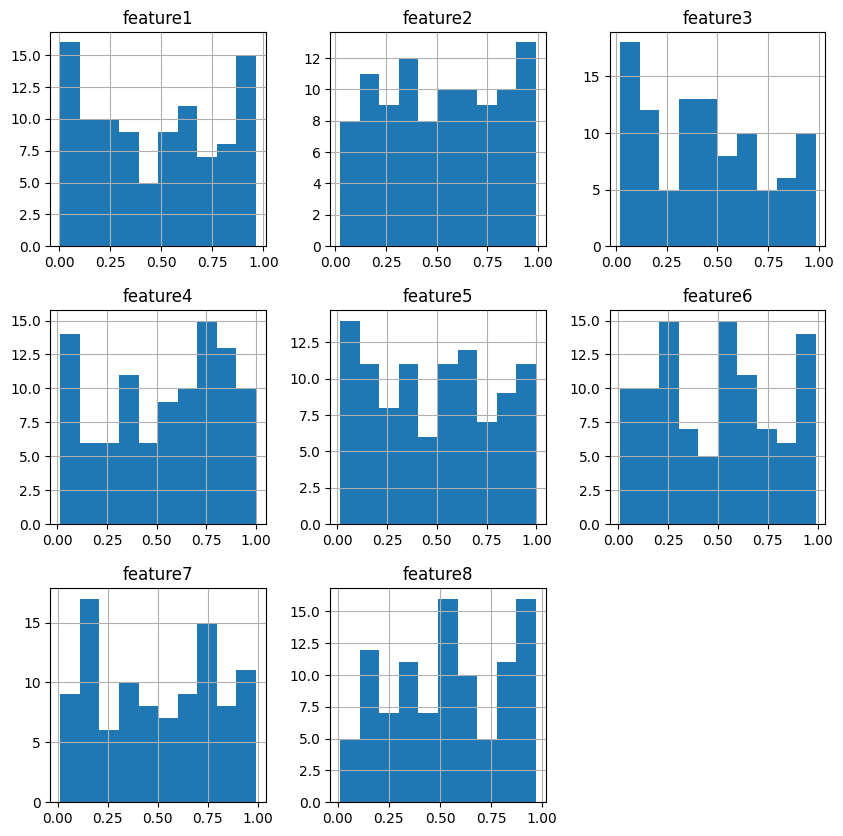

In [6]:
df.hist(figsize=(10,10))

In [7]:
class Linear_Regression:
  def __init__(self, X):
    self.X = X
    num_sample,num_feature = X.shape
    self.slope = np.zeros((num_feature ,1))
    self.intercept = 0

  def predict(self):
    return np.dot(self.X, self.slope) + self.intercept

  def fit(self, learning_rate, num_iterations, learning_tolarance, Y):
    running_loss = 0.0
    losses = []

    for _ in range(num_iterations):
      y_pred = self.predict()

      #Calculate Loss
      loss = 1/(2*len(self.X)) * np.sum((y_pred - Y)**2)
      running_loss += loss
      losses.append(loss)

      #Calculate Gradient
      dw = 1/(len(self.X)) * np.dot(self.X.T, (y_pred - Y))
      db = 1/(len(self.X)) * np.sum(y_pred - Y)

      #Update Model
      self.slope -= learning_rate*dw
      self.intercept -= learning_rate*db

      if running_loss < learning_tolarance:
        break

    return losses

In [8]:
#hyperparameter
learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]
num_iterations= 100
learning_tolerance = 0.0001
loss_history = []
KFold = KFold(n_splits=5, shuffle=True, random_state=42)

In [9]:
loss_tracker = {lr: [] for lr in learning_rates}

for fold, (train_index, test_index) in enumerate(KFold.split(X)):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  for learning_rate in learning_rates:
    model = Linear_Regression(X_train)
    loss = model.fit(learning_rate, num_iterations, learning_tolerance, y_train)
    loss_tracker[learning_rate].append(loss)
    print(f"Fold {fold + 1}, Learning Rate {learning_rate}: Loss {loss}")

# Calculate and Print Average Loss per Learning Rate
average_loss_per_lr = {lr: np.mean([loss[-1] for loss in losses]) for lr, losses in loss_tracker.items()}
print("\nAverage Loss per Learning Rate:")

for lr, avg_loss in average_loss_per_lr.items():
    print(f"Learning Rate {lr}: Average Loss {avg_loss}")

Fold 1, Learning Rate 0.001: Loss [0.14984177498151288, 0.14919486857847594, 0.1485519756957073, 0.14791307139392249, 0.14727813088881167, 0.1466471295500766, 0.14602004290047352, 0.14539684661486194, 0.1447775165192598, 0.14416202858990387, 0.14355035895231633, 0.1429424838803772, 0.14233837979540231, 0.14173802326522725, 0.14114139100329673, 0.14054845986775993, 0.13995920686057106, 0.13937360912659602, 0.13879164395272414, 0.13821328876698571, 0.13763852113767489, 0.13706731877247808, 0.13649965951760779, 0.13593552135694187, 0.1353748824111678, 0.13481772093693287, 0.1342640153259991, 0.13371374410440365, 0.13316688593162446, 0.13262341959975116, 0.13208332403266068, 0.1315465782851987, 0.13101316154236556, 0.13048305311850747, 0.12995623245651286, 0.12943267912701356, 0.1289123728275909, 0.12839529338198705, 0.1278814207393208, 0.12737073497330859, 0.12686321628149028, 0.12635884498445962, 0.12585760152509962, 0.12535946646782262, 0.12486442049781515, 0.1243724444202873, 0.1238835

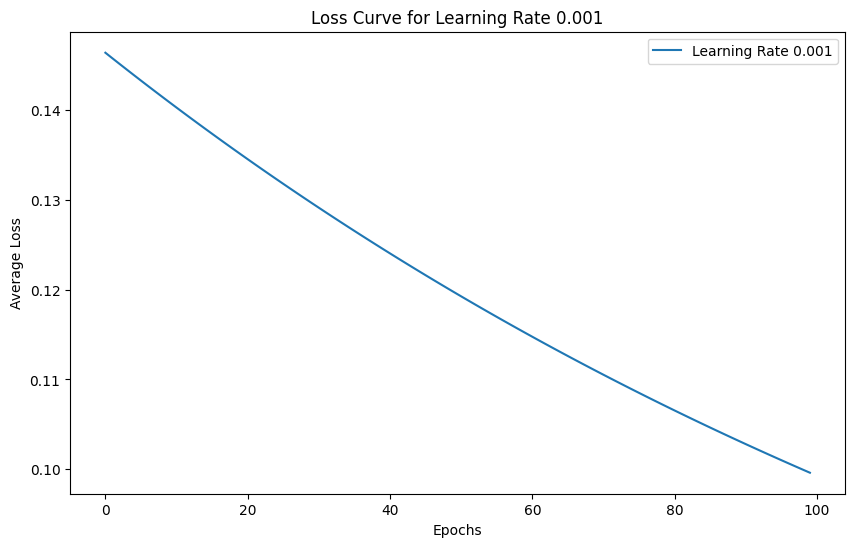

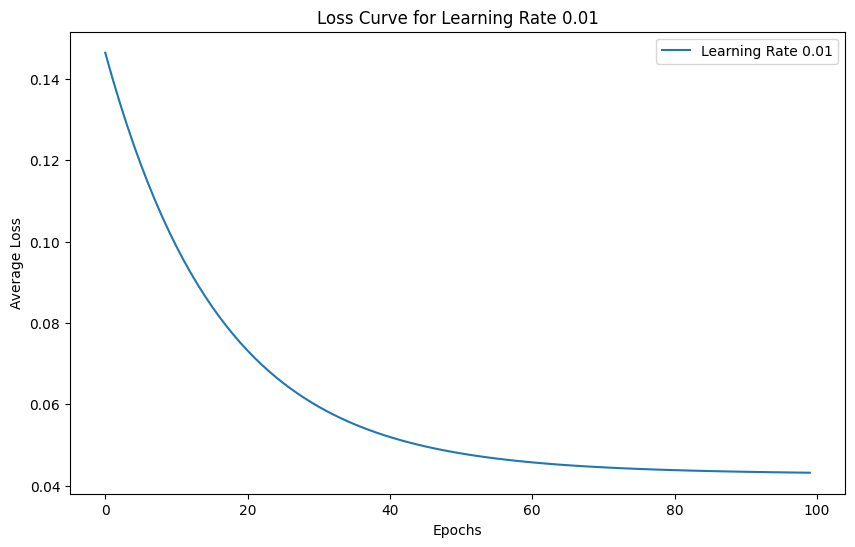

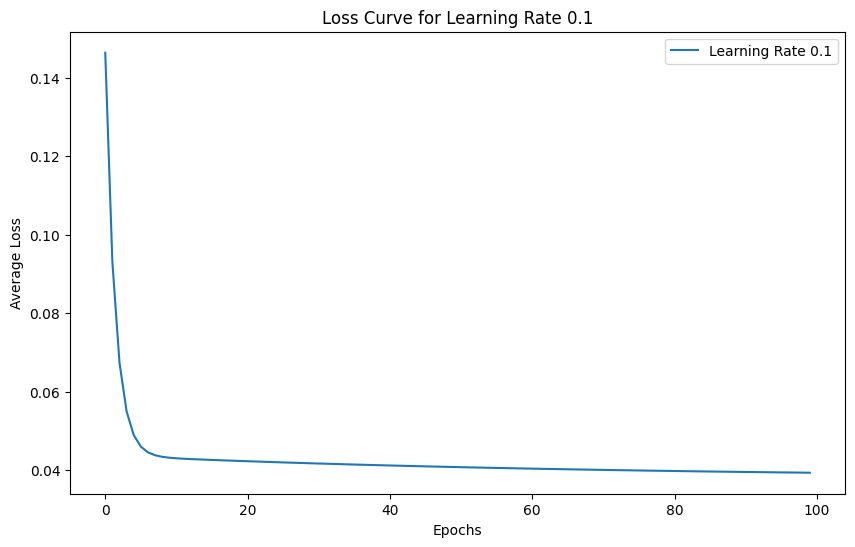

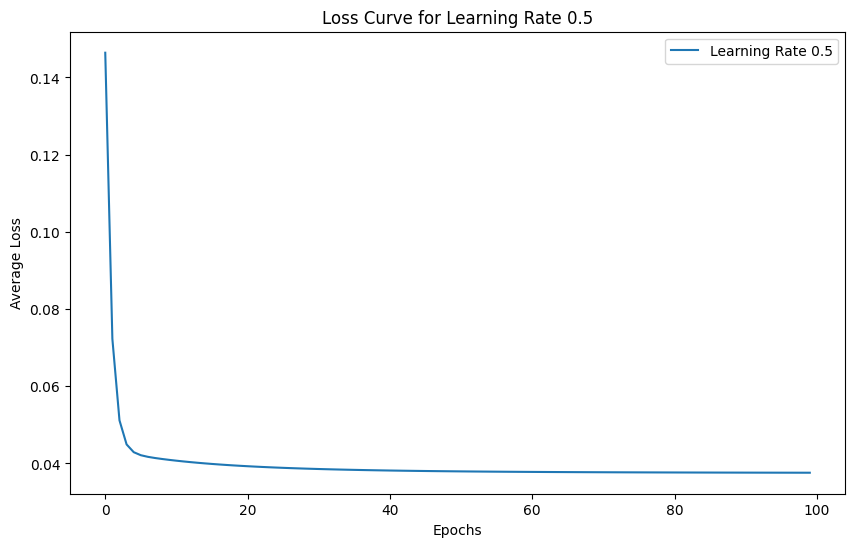

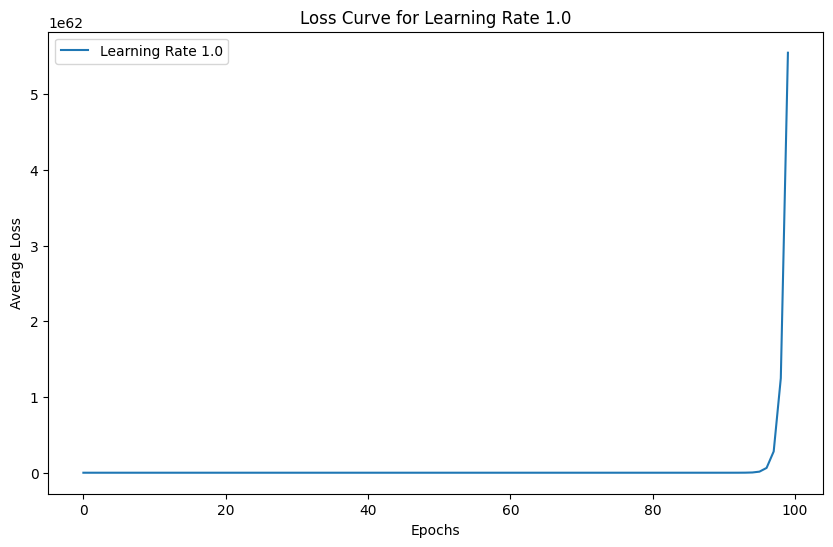

In [20]:
for lr, avg_loss in loss_tracker.items():
    avg_loss = np.mean(avg_loss, axis=0)
    plt.figure(figsize=(10, 6))
    plt.plot(avg_loss, label=f'Learning Rate {lr}')
    plt.legend()
    plt.title(f'Loss Curve for Learning Rate {lr}')
    plt.xlabel('Epochs')
    plt.ylabel('Average Loss')
    plt.show()

According to **Occam's Razor**, the simplest solution that adequately explains the problem or achieves the objective should be preferred. Applying this principle to your choice of learning rate involves considering:

1. **Performance:** A learning rate that achieves low loss efficiently without complications.
2. **Stability:** A learning rate that avoids risks like oscillations or divergence.
3. **Simplicity:** A learning rate that minimizes the need for extra adjustments (e.g., fine-tuning, monitoring for instability).

---

### Applying Occam's Razor to Your Learning Rates:
1. **Learning Rate 0.001:**
   - **Pro:** Very safe and stable.
   - **Con:** Too slow, inefficient for most practical purposes. This violates simplicity in terms of training time.
   - **Verdict:** Not the best choice.

2. **Learning Rate 0.01:**
   - **Pro:** Faster convergence than 0.001, stable, and simple to use.
   - **Con:** Takes slightly longer than 0.1 or 0.5 to reach minimum loss.
   - **Verdict:** A balanced and simple choice, but could be less efficient than 0.1.

3. **Learning Rate 0.1:**
   - **Pro:** Rapid convergence, low loss, and no observed instability.
   - **Con:** Requires validation to ensure generalization, but no significant risks are evident.
   - **Verdict:** The best balance of speed, simplicity, and effectiveness. Likely the simplest solution.

4. **Learning Rate 0.5:**
   - **Pro:** Very fast convergence and achieves a low loss.
   - **Con:** Higher risk of instability and poor generalization due to its aggressiveness. Requires more monitoring and validation.
   - **Verdict:** Adds complexity, so it is not the simplest option.

5. **Learning Rate 1.0:**
   - **Pro:** None.
   - **Con:** Completely unstable and diverges.
   - **Verdict:** Not a viable choice.

---

### **Best Choice: Learning Rate 0.1**
- It balances simplicity, efficiency, and stability, aligning well with Occam's Razor.
- While 0.5 converges faster, the additional risks and potential need for adjustments make it less "simple" in practice.
  
Would you like to validate this choice further with unseen data or other metrics?